# Tunning Binary Classifier Models - For CInc

## Importing Libraries

In [145]:
import pandas as pd
rs = 42
import numpy as np
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from scipy.stats import loguniform as sp_loguniform
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
rs = 42
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  accuracy_score,make_scorer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import mlxtend
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn import metrics
from numpy import arange
#pip install scikit-plot
from sklearn.metrics import confusion_matrix
#import scikitplot as skplt

from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import cross_val_score
from numpy import mean, std
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

# created functions
from evaluation import cross_validation_report,print_confusion_matrix,cross_validation_report_reg,nulls,boxplot_metrics, time_bar_chart,test_validation_bin, multi_algo_auc_plot

In [9]:
#!pip install mlxtend
#!pip install scikitplot

## Importing Data

In [11]:
# importing dataset
dataset_l_tr = pd.read_csv('files/df_tr_l.csv')
dataset_l_ho = pd.read_csv('files/df_ho_l.csv')

In [12]:
dataset_l_tr.drop(['Donates','Volunteers'], axis = 1, inplace = True)
dataset_l_ho.drop(['Donates','Volunteers'], axis = 1, inplace = True)

In [113]:
# split the data into X and Y
y_ltr_c = dataset_l_tr['quant'].copy()
y_ltr_r = dataset_l_tr['CInc'].copy()
X_ltr = dataset_l_tr.drop(['CInc','quant'],axis=1).copy()

y_lho_c = dataset_l_ho['quant'].copy()
y_lho_r = dataset_l_ho['CInc'].copy()
X_lho = dataset_l_ho.drop(['CInc','quant'],axis=1).copy()


In [14]:
cv = StratifiedKFold(n_splits=10, random_state=rs, shuffle = True)

## Models

### Random Forest Tunning

In [15]:
est = RandomForestClassifier(n_jobs = -1, random_state = rs)
rfe = RFE(est, n_features_to_select=  20)
rfe.fit(X_ltr, y_ltr_c)
selected_feat_rf = []
for i in range(X_ltr.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (X_ltr.columns[i], rfe.support_[i], rfe.ranking_[i]))
    if rfe.support_[i] == True: 
        selected_feat_rf.append(X_ltr.columns[i])
selected_feat_rf

Column: Bachelor_GPA, Selected True, Rank: 1.000
Column: Bachelor_Honors, Selected False, Rank: 37.000
Column: Age, Selected True, Rank: 1.000
Column: Gender, Selected True, Rank: 1.000
Column: Scholarship_Percent, Selected True, Rank: 1.000
Column: First_Comp_Size, Selected True, Rank: 1.000
Column: Country_First_Job, Selected False, Rank: 29.000
Column: Years_Worked_Foreign, Selected True, Rank: 1.000
Column: Senior_Position, Selected False, Rank: 12.000
Column: People_in_Charge, Selected True, Rank: 1.000
Column: Negotiation_Imp, Selected True, Rank: 1.000
Column: TeamWork_Imp, Selected True, Rank: 1.000
Column: Innovation_Imp, Selected True, Rank: 1.000
Column: Communication_Imp, Selected True, Rank: 1.000
Column: Planning_Imp, Selected True, Rank: 1.000
Column: No_Created_Ventures, Selected True, Rank: 1.000
Column: Used_Incubator_program, Selected False, Rank: 56.000
Column: Board_Member, Selected False, Rank: 21.000
Column: NonProfit_Business, Selected False, Rank: 45.000
Column

['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Negotiation_Imp',
 'TeamWork_Imp',
 'Innovation_Imp',
 'Communication_Imp',
 'Planning_Imp',
 'No_Created_Ventures',
 'School_Other',
 'Curr_Loc_Foreign',
 'CurrE_Employee',
 'CurrE_Senior Manager',
 'CInd_Tertiary',
 'FInc',
 'work_hours_week']

In [16]:
selected_feat_rf

['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Negotiation_Imp',
 'TeamWork_Imp',
 'Innovation_Imp',
 'Communication_Imp',
 'Planning_Imp',
 'No_Created_Ventures',
 'School_Other',
 'Curr_Loc_Foreign',
 'CurrE_Employee',
 'CurrE_Senior Manager',
 'CInd_Tertiary',
 'FInc',
 'work_hours_week']

In [18]:
selected_feat_rf =['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Negotiation_Imp',
 'TeamWork_Imp',
 'Innovation_Imp',
 'Communication_Imp',
 'Planning_Imp',
 'No_Created_Ventures',
 'School_Other',
 'Curr_Loc_Foreign',
 'CurrE_Employee',
 'CurrE_Senior Manager',
 'CInd_Tertiary',
 'FInc',
 'work_hours_week']

In [17]:
rf_grid_search= GridSearchCV(estimator = est, param_grid={'n_estimators': [10, 100, 500,1000], 'min_samples_leaf': [2,4,6,8],'min_samples_split' : [2, 5, 10] }, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score=0, verbose = 2)
rf_grid_win = rf_grid_search.fit(X_ltr[selected_feat_rf], y_ltr_c)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  8.1min finished


In [23]:
# Get the estimator
best_clf_rf = rf_grid_win.best_estimator_
best_clf_rf
#results in data frame
rf_results = pd.DataFrame(rf_grid_win.cv_results_)
# show the first 5 rows
display(rf_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.223835,0.053513,0.119936,0.015322,2,2,10,"{'min_samples_leaf': 2, 'min_samples_split': 2...",0.789510,0.769231,...,0.767832,0.789510,0.764336,0.756643,0.747552,0.765035,0.767670,0.770124,0.013056,47
1,1.918979,0.327333,0.165338,0.063174,2,2,100,"{'min_samples_leaf': 2, 'min_samples_split': 2...",0.807692,0.783916,...,0.783916,0.804196,0.780420,0.781818,0.768531,0.776224,0.783065,0.788097,0.013634,18
2,10.589157,0.561987,0.491090,0.091869,2,2,500,"{'min_samples_leaf': 2, 'min_samples_split': 2...",0.805594,0.784615,...,0.784615,0.806294,0.781818,0.778322,0.776923,0.778322,0.780266,0.788586,0.012315,14
3,20.920917,0.730200,0.845185,0.085118,2,2,1000,"{'min_samples_leaf': 2, 'min_samples_split': 2...",0.804196,0.784615,...,0.778322,0.806993,0.779720,0.776923,0.777622,0.781818,0.780966,0.788236,0.012853,17
4,0.372203,0.075315,0.155787,0.041941,2,5,10,"{'min_samples_leaf': 2, 'min_samples_split': 5...",0.788112,0.759441,...,0.753846,0.773427,0.758042,0.758042,0.758042,0.762238,0.770469,0.766697,0.011520,48


In [24]:
# Report the before-and-afterscores
print ("\nUnoptimized model:\n------")
# evaluate model
n_scores = cross_val_score(est,X_ltr[selected_feat_rf], y_ltr_c,scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Unoptimized model:
------
Accuracy score: 0.785 (0.013)


In [25]:
rf_scores = np.array(rf_results.mean_test_score)
print ("Best gridsearch parameters\n------")
print (rf_grid_win.best_params_)
print ("----------")
print ("Best score\n------")
print (rf_grid_win.best_score_)

Best gridsearch parameters
------
{'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 1000}
----------
Best score
------
0.7890751515804


In [26]:
rf_bin = RandomForestClassifier(random_state = rs, min_samples_leaf=4, min_samples_split= 10 , n_estimators = 1000)

### Lasso Logistic Regression

In [27]:
# Create cross-validated logistic regression
clf = LogisticRegressionCV(random_state=rs, penalty = 'l1', solver = 'liblinear',  verbose = 2, n_jobs=-1 , Cs=np.linspace(0.001, 0.06, 100), cv = cv)
# Train model
clf_grid_win= clf.fit(X_ltr, y_ltr_c)
clf_grid_win.C_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.3min remaining:   32.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.9min finished


[LibLinear]

array([0.04867677])

Text(0, 0.5, 'Mean CV-accuracy')

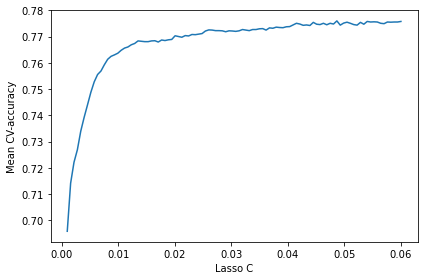

In [29]:
c_values = np.linspace(0.001, 0.06, 100)
plt.plot(c_values, np.mean(clf_grid_win.scores_[1], axis=0))
plt.xlabel('Lasso C')
plt.ylabel('Mean CV-accuracy')

In [30]:
model_pipe = Pipeline([('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state = rs, penalty = 'l1', n_jobs = -1, solver = 'liblinear'))
])
params={'model__C':  np.linspace(0.001, 0.06, 100)}
lr_grid_search = GridSearchCV(model_pipe, param_grid= params,scoring='accuracy', cv=cv, n_jobs=-1)
lr_grid_win = lr_grid_search.fit(X_ltr, y_ltr_c)
print('Accuracy: %.3f' % lr_grid_win.best_score_)
print('Config: %s' % lr_grid_win.best_params_)

Accuracy: 0.780
Config: {'model__C': 0.05880808080808081}


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [31]:
# Get the estimator
best_clf_lr = lr_grid_win.best_estimator_
best_clf_lr
#results in data frame
lr_results = pd.DataFrame(lr_grid_win.cv_results_)
# show the first 5 rows
display(lr_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.151331,0.007205,0.005649,0.000413,0.001,{'model__C': 0.001},0.751748,0.741958,0.732867,0.750350,0.742657,0.728671,0.730070,0.706993,0.714685,0.734080,0.733408,0.013655,100
1,0.151583,0.006611,0.005856,0.000916,0.00159596,{'model__C': 0.001595959595959596},0.759441,0.758042,0.751049,0.765035,0.762937,0.744755,0.754545,0.730070,0.734266,0.745276,0.750542,0.011228,99
2,0.153616,0.003721,0.005510,0.000441,0.00219192,{'model__C': 0.002191919191919192},0.771329,0.769930,0.767832,0.765035,0.774825,0.755245,0.764336,0.746853,0.739860,0.749475,0.760472,0.011233,98
3,0.155006,0.004129,0.005473,0.000344,0.00278788,{'model__C': 0.002787878787878788},0.774126,0.771329,0.776923,0.769231,0.772727,0.758741,0.771329,0.757343,0.746853,0.752274,0.765088,0.009860,97
4,0.159016,0.004941,0.005504,0.000291,0.00338384,{'model__C': 0.003383838383838384},0.779720,0.775524,0.782517,0.767133,0.770629,0.762238,0.772727,0.756643,0.748951,0.754374,0.767046,0.010660,96


In [32]:
lr_scores = np.array(lr_results.mean_test_score)
print ("Best gridsearch parameters\n------")
print (lr_grid_win.best_params_)
print ("----------")
print ("Best score\n------")
print (lr_grid_win.best_score_)

Best gridsearch parameters
------
{'model__C': 0.05880808080808081}
----------
Best score
------
0.7795646620699106


In [48]:
lr = LogisticRegression(random_state=rs, penalty = 'l1', verbose = 2, n_jobs = -1, C = 0.0403, solver = 'saga')
#sel_ = SelectFromModel(lr, max_features = 20)
#sel_.fit(X_ltr, y_ltr_c)
#selected_feat_lr = X_ltr.columns[(sel_.get_support())]
#selected_feat_lr
#sel_ =  RFE(lr, n_features_to_select=  20)
#sel_.fit(X_ltr, y_ltr_c)
#selected_feat_lr = X_ltr.columns[(sel_.get_support())]
#selected_feat_lr

In [97]:
sfs_LR = SFS(lr, 
          k_features=20, 
          forward=True, 
          floating=True, 
          scoring='accuracy',
          cv=5,
          n_jobs=-1,
           verbose = 2)

In [98]:
sbs = sfs_LR.fit(X_ltr, y_ltr_c)
print('\nSequential Forward Floating Selection (k=20):')
print(sfs_LR.k_feature_idx_)
print('CV Score:')
print(sfs_LR.k_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.8s finished

[2020-11-20 15:59:11] Features: 1/20 -- score: 0.6698371233523385[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished

[2020-11-20 15:59:26] Features: 2/20 -- score: 0.7114482299791848[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:   14.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-


Sequential Forward Floating Selection (k=20):
(1, 2, 3, 7, 8, 9, 14, 25, 26, 27, 29, 35, 37, 47, 56, 60, 63, 65, 68, 72)
CV Score:
0.7703334336177988


[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   11.8s finished

[2020-11-20 16:08:48] Features: 20/20 -- score: 0.7703334336177988

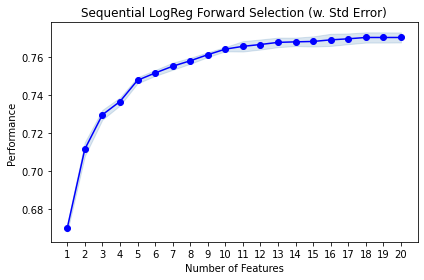

In [105]:
plot_sfs(sfs_LR.get_metric_dict(), kind='std_err');
plt.title('Sequential LogReg Forward Selection (w. Std Error)')
plt.show()

In [111]:
selected_feat_lr = X_ltr.columns[[sbs.k_feature_idx_]]
selected_feat_lr

Index(['Bachelor_Honors', 'Age', 'Gender', 'Years_Worked_Foreign',
       'Senior_Position', 'People_in_Charge', 'Planning_Imp', 'First_Gen',
       'Pos_Grad_Degree', 'Nationality_For', 'School_Other', 'Campus_Virtual',
       'Curr_Loc_Foreign', 'MO_Employee', 'FInd_Primary', 'ccsize_large',
       'ccsize_self', 'CurrE_Employee', 'CurrE_Senior Manager',
       'CInd_Tertiary'],
      dtype='object')

In [112]:
selected_feat_lr = ['Bachelor_Honors', 'Age', 'Gender', 'Years_Worked_Foreign',
       'Senior_Position', 'People_in_Charge', 'Planning_Imp', 'First_Gen',
       'Pos_Grad_Degree', 'Nationality_For', 'School_Other', 'Campus_Virtual',
       'Curr_Loc_Foreign', 'MO_Employee', 'FInd_Primary', 'ccsize_large',
       'ccsize_self', 'CurrE_Employee', 'CurrE_Senior Manager',
       'CInd_Tertiary']

In [73]:

lr_bin = LogisticRegression(random_state=rs, penalty = 'l1', verbose = 2, n_jobs = -1, C = 0.0403, solver = 'saga')

## Decision Tree

In [148]:
est = DecisionTreeClassifier(random_state = rs)
rfe = RFE(est, n_features_to_select=  20)
rfe.fit(X_ltr, y_ltr_c)
selected_feat_dt  = []
for i in range(X_ltr.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (X_ltr.columns[i], rfe.support_[i], rfe.ranking_[i]))
    if rfe.support_[i] == True: 
        selected_feat_dt .append(X_ltr.columns[i])   

Column: Bachelor_GPA, Selected True, Rank: 1.000
Column: Bachelor_Honors, Selected False, Rank: 50.000
Column: Age, Selected True, Rank: 1.000
Column: Gender, Selected True, Rank: 1.000
Column: Scholarship_Percent, Selected True, Rank: 1.000
Column: First_Comp_Size, Selected True, Rank: 1.000
Column: Country_First_Job, Selected False, Rank: 32.000
Column: Years_Worked_Foreign, Selected True, Rank: 1.000
Column: Senior_Position, Selected False, Rank: 38.000
Column: People_in_Charge, Selected True, Rank: 1.000
Column: Negotiation_Imp, Selected True, Rank: 1.000
Column: TeamWork_Imp, Selected True, Rank: 1.000
Column: Innovation_Imp, Selected True, Rank: 1.000
Column: Communication_Imp, Selected True, Rank: 1.000
Column: Planning_Imp, Selected True, Rank: 1.000
Column: No_Created_Ventures, Selected True, Rank: 1.000
Column: Used_Incubator_program, Selected False, Rank: 56.000
Column: Board_Member, Selected False, Rank: 25.000
Column: NonProfit_Business, Selected False, Rank: 55.000
Column

In [150]:
selected_feat_dt = ['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Negotiation_Imp',
 'TeamWork_Imp',
 'Innovation_Imp',
 'Communication_Imp',
 'Planning_Imp',
 'No_Created_Ventures',
 'Love_relationships',
 'School_Engineering',
 'Curr_Loc_Foreign',
 'CurrE_Employee',
 'CInd_Tertiary',
 'FInc',
 'work_hours_week']

In [155]:
dt_grid_search= GridSearchCV(estimator = est, param_grid={'max_depth' : [2,4,6,8]}, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score=0, verbose = 2)
dt_grid_win = dt_grid_search.fit(X_ltr[selected_feat_dt], y_ltr_c)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.3s finished


In [158]:
print('Mean Accuracy: %.3f' % dt_grid_win.best_score_)
print('Config: %s' % dt_grid_win.best_params_)

Mean Accuracy: 0.767
Config: {'max_depth': 6}


In [159]:
dt_bin = DecisionTreeClassifier( max_depth = 6)

### LDA Tuning

In [89]:
lda = LinearDiscriminantAnalysis()

In [92]:
sfs_lda = SFS(lda, 
          k_features=20, 
          forward=True, 
          floating=True, 
          scoring='accuracy',
          cv=5,
          n_jobs=-1,
           verbose = 2)


In [93]:
sfs = sfs_lda.fit(X_ltr, y_ltr_c)
print('\nSequential Forward Floating Selection (k=20):')
print(sfs_lda.k_feature_idx_)
print('CV Score:')
print(sfs_lda.k_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    1.9s finished

[2020-11-20 15:54:41] Features: 1/20 -- score: 0.6698371233523385[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2020-11-20 15:54:42] Features: 2/20 -- score: 0.7065526114319398[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  58 out of  73 | elapsed:    0.7s remaining:    0.2s
[Pa


Sequential Forward Floating Selection (k=20):
(2, 3, 4, 6, 7, 8, 9, 25, 27, 34, 35, 37, 43, 45, 50, 58, 60, 63, 65, 72)
CV Score:
0.7732008110811889



[2020-11-20 15:55:20] Features: 20/20 -- score: 0.7732008110811889

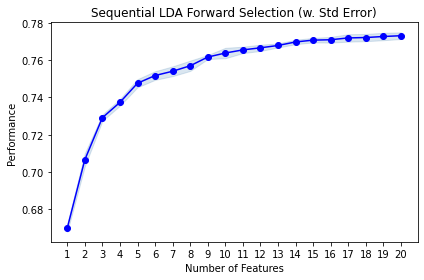

In [104]:
plot_sfs(sfs_lda.get_metric_dict(), kind='std_err');
plt.title('Sequential LDA Forward Selection (w. Std Error)')
plt.show()

In [101]:
sfs_lda2 = SFS(lda, 
          k_features=30, 
          forward=True, 
          floating=True, 
          scoring='accuracy',
          cv=5,
          n_jobs=-1,
           verbose = 2)
sfs = sfs_lda2.fit(X_ltr, y_ltr_c)
print('\nSequential Forward Floating Selection (k=20):')
print(sfs_lda2.k_feature_idx_)
print('CV Score:')
print(sfs_lda2.k_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.5s finished

[2020-11-20 16:09:59] Features: 1/30 -- score: 0.6698371233523385[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2020-11-20 16:10:00] Features: 2/30 -- score: 0.7065526114319398[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  58 out of  73 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    0.8s finished
[Parallel(n_j


Sequential Forward Floating Selection (k=20):
(0, 2, 3, 4, 6, 7, 8, 9, 11, 20, 23, 25, 27, 34, 35, 37, 41, 43, 45, 46, 47, 50, 58, 60, 61, 63, 65, 69, 71, 72)
CV Score:
0.7744596746380588


[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    1.9s finished

[2020-11-20 16:12:12] Features: 30/30 -- score: 0.7744596746380588

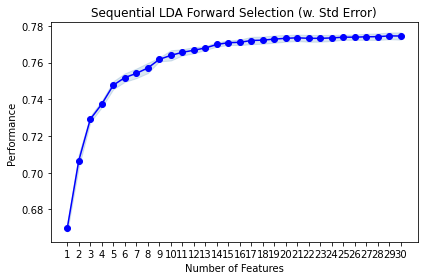

In [103]:
plot_sfs(sfs_lda2.get_metric_dict(), kind='std_err');
plt.title('Sequential LDA Forward Selection (w. Std Error)')
plt.show()

In [106]:
selected_feat_lda = X_ltr.columns[[sfs_lda.k_feature_idx_]]
selected_feat_lda

/opt/conda/lib/python3.7/site-packages/pandas/core/indexes/base.py:4107: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Index(['Age', 'Gender', 'Scholarship_Percent', 'Country_First_Job',
       'Years_Worked_Foreign', 'Senior_Position', 'People_in_Charge',
       'First_Gen', 'Nationality_For', 'Campus_South', 'Campus_Virtual',
       'Curr_Loc_Foreign', 'FO_Manager', 'FO_Public Server',
       'MO_Public Server', 'FInd_Secondary', 'ccsize_large', 'ccsize_self',
       'CurrE_Employee', 'CInd_Tertiary'],
      dtype='object')

In [107]:
selected_feat_lda =['Age', 'Gender', 'Scholarship_Percent', 'Country_First_Job',
       'Years_Worked_Foreign', 'Senior_Position', 'People_in_Charge',
       'First_Gen', 'Nationality_For', 'Campus_South', 'Campus_Virtual',
       'Curr_Loc_Foreign', 'FO_Manager', 'FO_Public Server',
       'MO_Public Server', 'FInd_Secondary', 'ccsize_large', 'ccsize_self',
       'CurrE_Employee', 'CInd_Tertiary']

In [110]:
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(lda, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_ltr[selected_feat_lda], y_ltr)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

NameError: name 'y_ltr' is not defined

In [114]:
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(lda, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_ltr[selected_feat_lda], y_ltr_c)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.771
Config: {'solver': 'svd'}


In [118]:
lda_bin = LinearDiscriminantAnalysis(solver =  'svd')

## NB

In [120]:
mnb = MultinomialNB()

In [121]:
sfs_nb = SFS(mnb, 
          k_features=20, 
          forward=True, 
          floating=True, 
          scoring='accuracy',
          cv=5,
          n_jobs=-1,
           verbose = 2)
sfs_nb = sfs_nb.fit(X_ltr, y_ltr_c)
print('\nSequential NB Forward Floating Selection (k=20):')
print(sfs_nb.k_feature_idx_)
print('CV Score:')
print(sfs_nb.k_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    1.8s finished

[2020-11-20 16:56:12] Features: 1/20 -- score: 0.5269599375790353[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2020-11-20 16:56:12] Features: 2/20 -- score: 0.6708161932506109[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    0.4s finished
[Parallel(n_j


Sequential NB Forward Floating Selection (k=20):
(0, 2, 3, 7, 9, 16, 20, 29, 34, 35, 37, 39, 57, 59, 63, 64, 65, 66, 68, 72)
CV Score:
0.7545282838881999



[2020-11-20 16:56:24] Features: 20/20 -- score: 0.7545282838881999

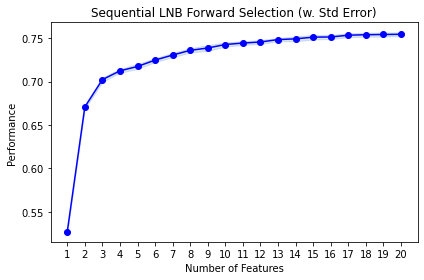

In [122]:
plot_sfs(sfs_nb.get_metric_dict(), kind='std_err');
plt.title('Sequential LNB Forward Selection (w. Std Error)')
plt.show()

In [123]:
selected_feat_nb = X_ltr.columns[[sfs_nb.k_feature_idx_]]
selected_feat_nb

/opt/conda/lib/python3.7/site-packages/pandas/core/indexes/base.py:4107: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Index(['Bachelor_GPA', 'Age', 'Gender', 'Years_Worked_Foreign',
       'People_in_Charge', 'Used_Incubator_program', 'Innovation',
       'School_Other', 'Campus_South', 'Campus_Virtual', 'Curr_Loc_Foreign',
       'Curr_Loc_Other', 'FInd_Quaternary', 'FInd_Tertiary', 'ccsize_self',
       'ccsize_small', 'CurrE_Employee', 'CurrE_Manager',
       'CurrE_Senior Manager', 'CInd_Tertiary'],
      dtype='object')

In [124]:
selected_feat_nb = ['Bachelor_GPA', 'Age', 'Gender', 'Years_Worked_Foreign',
       'People_in_Charge', 'Used_Incubator_program', 'Innovation',
       'School_Other', 'Campus_South', 'Campus_Virtual', 'Curr_Loc_Foreign',
       'Curr_Loc_Other', 'FInd_Quaternary', 'FInd_Tertiary', 'ccsize_self',
       'ccsize_small', 'CurrE_Employee', 'CurrE_Manager',
       'CurrE_Senior Manager', 'CInd_Tertiary']

In [127]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

nb_grid = GridSearchCV(mnb, param_grid=params, n_jobs=-1, cv=cv, verbose=5)
results = nb_grid.fit(X_ltr[selected_feat_nb], y_ltr_c)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


Mean Accuracy: 0.754
Config: {'alpha': 0.1}


In [140]:
nb_bin = MultinomialNB(alpha = 0.1)

## KNN Tunning

In [131]:
knn_clf = KNeighborsClassifier(n_jobs = -1)
sfs_knn = SFS(knn_clf, 
          k_features=20, 
          forward=True, 
          floating=True, 
          scoring='accuracy',
          cv=5,
          n_jobs=-1)
sfs_knn = sfs_knn.fit(X_ltr, y_ltr_c)
print('\nSequential NB Forward Floating Selection (k=20):')
print(sfs_knn.k_feature_idx_)
print('CV Score:')
print(sfs_knn.k_score_)


Sequential NB Forward Floating Selection (k=20):
(2, 3, 7, 9, 16, 27, 29, 32, 34, 37, 43, 46, 53, 58, 62, 64, 65, 70, 71, 72)
CV Score:
0.7534092804711903


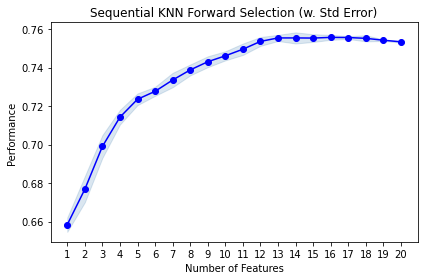

In [132]:
plot_sfs(sfs_knn.get_metric_dict(), kind='std_err');
plt.title('Sequential KNN Forward Selection (w. Std Error)')
plt.show()

In [133]:
selected_feat_knn = X_ltr.columns[[sfs_knn.k_feature_idx_]]
selected_feat_knn

/opt/conda/lib/python3.7/site-packages/pandas/core/indexes/base.py:4107: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Index(['Age', 'Gender', 'Years_Worked_Foreign', 'People_in_Charge',
       'Used_Incubator_program', 'Nationality_For', 'School_Other',
       'Campus_MTY', 'Campus_South', 'Curr_Loc_Foreign', 'FO_Manager',
       'MO_Business Owner or Partner', 'FirstE_Manager_Owner',
       'FInd_Secondary', 'ccsize_med2', 'ccsize_small', 'CurrE_Employee',
       'CInd_Quaternary', 'CInd_Secondary', 'CInd_Tertiary'],
      dtype='object')

In [134]:
selected_feat_knn = ['Age', 'Gender', 'Years_Worked_Foreign', 'People_in_Charge',
       'Used_Incubator_program', 'Nationality_For', 'School_Other',
       'Campus_MTY', 'Campus_South', 'Curr_Loc_Foreign', 'FO_Manager',
       'MO_Business Owner or Partner', 'FirstE_Manager_Owner',
       'FInd_Secondary', 'ccsize_med2', 'ccsize_small', 'CurrE_Employee',
       'CInd_Quaternary', 'CInd_Secondary', 'CInd_Tertiary']

In [135]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,20))
n_neighbors = list(range(1,20))
p=[1,2] # When p= 1 it is the manhattan and when it is 2 is the euclidean
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
search= GridSearchCV(knn_clf, hyperparameters, cv=cv, n_jobs = -1)

In [136]:
knn_grid_win = search.fit(X_ltr[selected_feat_knn], y_ltr_c)

In [137]:
# Get the estimator
best_clf_knn = knn_grid_win.best_estimator_
best_clf_knn
#results in data frame
knn_results = pd.DataFrame(knn_grid_win.cv_results_)
# show the first 5 rows
display(knn_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.115441,0.038836,0.331745,0.046697,1,1,1,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}",0.694406,0.713986,...,0.703497,0.705594,0.698601,0.695804,0.687413,0.695105,0.702589,0.699839,0.006934,665
1,0.133338,0.049590,0.346586,0.090365,1,1,2,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2}",0.694406,0.712587,...,0.704196,0.703497,0.697902,0.696503,0.687413,0.695804,0.702589,0.699490,0.006452,666
2,0.137641,0.046362,0.404370,0.089397,1,2,1,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 1}",0.682517,0.691608,...,0.690909,0.711888,0.700000,0.686014,0.690210,0.683916,0.692092,0.693475,0.009046,722
3,0.144754,0.044556,0.381006,0.085542,1,2,2,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 2}",0.683916,0.692308,...,0.690210,0.711189,0.700000,0.685315,0.689510,0.685315,0.692792,0.693615,0.008694,721
4,0.178319,0.061079,0.486234,0.094938,1,3,1,"{'leaf_size': 1, 'n_neighbors': 3, 'p': 1}",0.740559,0.737762,...,0.737063,0.748951,0.735664,0.729371,0.721678,0.718881,0.732680,0.733827,0.008360,605


In [138]:
# summarize
print('Mean Accuracy: %.3f' % knn_grid_win.best_score_)
print('Config: %s' % knn_grid_win.best_params_)

Mean Accuracy: 0.764
Config: {'leaf_size': 7, 'n_neighbors': 14, 'p': 1}


In [139]:
knn_bin = KNeighborsClassifier(n_jobs = -1, leaf_size = 7, n_neighbors = 14, p = 1) 

### Light Gradient Boosting Tunning

In [29]:
# Load the object
#import pickle
#with open('tuned_models/binary_lgb_model_win.data','rb') as data:
    #lgb_grid_win= pickle.load(data)
#with open('tuned_models/binary_lgb_model_grid.data','rb') as data:
    #lgb_grid_search= pickle.load(data)

In [74]:
est = LGBMClassifier(random_state = rs)
rfe = RFE(est, n_features_to_select=  20)
rfe.fit(X_ltr, y_ltr_c)
selected_feat_lgb  = []
for i in range(X_ltr.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (X_ltr.columns[i], rfe.support_[i], rfe.ranking_[i]))
    if rfe.support_[i] == True: 
        selected_feat_lgb .append(X_ltr.columns[i])   

Column: Bachelor_GPA, Selected True, Rank: 1.000
Column: Bachelor_Honors, Selected False, Rank: 25.000
Column: Age, Selected True, Rank: 1.000
Column: Gender, Selected True, Rank: 1.000
Column: Scholarship_Percent, Selected True, Rank: 1.000
Column: First_Comp_Size, Selected True, Rank: 1.000
Column: Country_First_Job, Selected False, Rank: 34.000
Column: Years_Worked_Foreign, Selected True, Rank: 1.000
Column: Senior_Position, Selected False, Rank: 30.000
Column: People_in_Charge, Selected True, Rank: 1.000
Column: Negotiation_Imp, Selected True, Rank: 1.000
Column: TeamWork_Imp, Selected False, Rank: 7.000
Column: Innovation_Imp, Selected False, Rank: 3.000
Column: Communication_Imp, Selected False, Rank: 13.000
Column: Planning_Imp, Selected True, Rank: 1.000
Column: No_Created_Ventures, Selected True, Rank: 1.000
Column: Used_Incubator_program, Selected False, Rank: 53.000
Column: Board_Member, Selected False, Rank: 17.000
Column: NonProfit_Business, Selected False, Rank: 56.000
Co

In [15]:
selected_feat_lgb = ['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Negotiation_Imp',
 'Planning_Imp',
 'No_Created_Ventures',
 'School_Other',
 'Campus_Virtual',
 'Curr_Loc_Foreign',
 'ccsize_large',
 'CurrE_Employee',
 'CurrE_Manager',
 'CurrE_Senior Manager',
 'CInd_Tertiary',
 'FInc',
 'work_hours_week']

In [79]:
pipe_lgb = Pipeline(steps=[('s',rfe),('m',est)])
# evaluate model
n_scores = cross_val_score(pipe_lgb, X_ltr, y_ltr_c, scoring='accuracy', cv=2, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.781 (0.003)


In [80]:
lgb_grid_search= GridSearchCV(estimator = est, param_grid={'max_depth': [2,4,6,8], 'n_estimators': [10, 100, 500], 'num_leaves': [4,16,32,64] , 'learning_rate':list(np.logspace(np.log(0.005), np.log(0.2),base = np.exp(1), num= 10)) }, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score=0, verbose = 2)
lgb_grid_win = lgb_grid_search.fit(X_ltr[selected], y_ltr_c)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 713 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 1085 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1570 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2164 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2776 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3505 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 4274 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  6.3min finished


In [81]:
# Get the estimator
best_clf_lgb = lgb_grid_win.best_estimator_
best_clf_lgb
#results in data frame
lgb_results = pd.DataFrame(lgb_grid_win.cv_results_)
# show the first 5 rows
display(lgb_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_num_leaves,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.100888,0.022523,0.005131,0.000303,0.005,2,10,4,"{'learning_rate': 0.005000000000000004, 'max_d...",0.527273,...,0.527273,0.527273,0.526573,0.526573,0.526573,0.526573,0.526942,0.526960,0.000330,458
1,0.076068,0.001018,0.005082,0.000198,0.005,2,10,16,"{'learning_rate': 0.005000000000000004, 'max_d...",0.527273,...,0.527273,0.527273,0.526573,0.526573,0.526573,0.526573,0.526942,0.526960,0.000330,458
2,0.073703,0.004816,0.004842,0.000169,0.005,2,10,32,"{'learning_rate': 0.005000000000000004, 'max_d...",0.527273,...,0.527273,0.527273,0.526573,0.526573,0.526573,0.526573,0.526942,0.526960,0.000330,458
3,0.072951,0.005242,0.004733,0.000548,0.005,2,10,64,"{'learning_rate': 0.005000000000000004, 'max_d...",0.527273,...,0.527273,0.527273,0.526573,0.526573,0.526573,0.526573,0.526942,0.526960,0.000330,458
4,0.236999,0.002038,0.008521,0.000194,0.005,2,100,4,"{'learning_rate': 0.005000000000000004, 'max_d...",0.740559,...,0.750350,0.738462,0.712587,0.741958,0.709790,0.716084,0.727082,0.733547,0.015936,412


In [82]:
lgb_scores = np.array(lgb_results.mean_test_score)
print ("Best gridsearch parameters\n------")
print (lgb_grid_win.best_params_)
print ("----------")
print ("Best score\n------")
print (lgb_grid_win.best_score_)

Best gridsearch parameters
------
{'learning_rate': 0.01709975946676697, 'max_depth': 8, 'n_estimators': 500, 'num_leaves': 32}
----------
Best score
------
0.7988659975433943


In [83]:
lgbm_bin = LGBMClassifier(random_state = rs,  max_depth = 8, n_estimators =  500, num_leaves = 32, learning_rate = 0.017)

In [46]:
# Save the object in a python file
#import pickle
#with open('tuned_models/binary_lgb_model_win.data','wb') as data:
    #pickle.dump(lgb_grid_win, data)
#with open('tuned_models/binary_lgb_model_grid.data','wb') as data:
    #pickle.dump(lgb_grid_search, data)

## Evaluation

In [63]:
classifiers = {}
auc_results = {}
f1_results = {}
acc_results = {}
kappa_results = {}
clf_time = {}
classifiers['acc'] = acc_results
classifiers['f1'] = f1_results
classifiers['auc'] = auc_results
classifiers['kappa'] = kappa_results
classifiers['time'] = clf_time

In [64]:
from sklearn.dummy import DummyClassifier, DummyRegressor

In [65]:



dummy = DummyClassifier(random_state= rs, strategy = 'uniform') # generates prediction uniformly at random

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Model: LogReg w/Selected Features
 AUC : 0.8504470930783142
 F1 weighted : 0.7720027942253294
 Accuracy : 0.7721511938026984
 Kappa Statitic : 0.5427451106830674
Process Complete in : 1.052675724029541 sec.


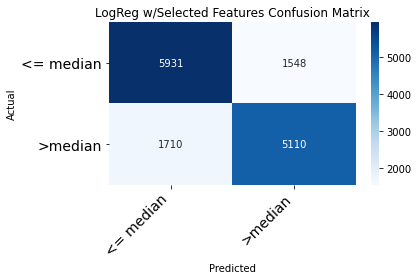

In [66]:
name = 'LogReg w/Selected Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cross_validation_report(X_ltr[selected_feat_lr ],y_ltr_c,lr_bin,cnames = ['<= median', '>median'],model_name = name,scale = True)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Model: LogReg w/All Features
 AUC : 0.8553460639179337
 F1 weighted : 0.7750948347640463
 Accuracy : 0.7752290466706142
 Kappa Statitic : 0.5489021771506271
Process Complete in : 2.47886323928833 sec.


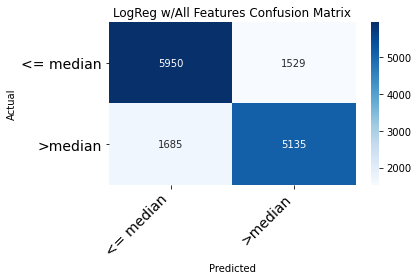

In [67]:
name = 'LogReg w/All Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cross_validation_report(X_ltr,y_ltr_c,lr_bin,cnames = ['<= median', '>median'],model_name = name,scale = True)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: RF w/Selected Features
 AUC : 0.8648664235838371
 F1 weighted : 0.7853684916913022
 Accuracy : 0.7854391794349806
 Kappa Statitic : 0.5695783247740052
Process Complete in : 126.42367219924927 sec.


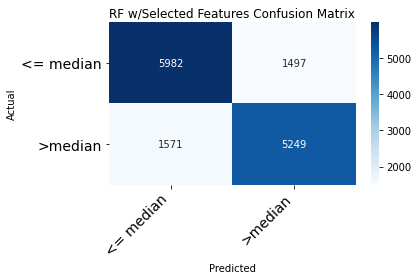

In [68]:
name = 'RF w/Selected Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cross_validation_report(X_ltr[selected_feat_rf  ],y_ltr_c,rf_bin,cnames = ['<= median', '>median'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: RF w/All Features
 AUC : 0.8733748804955358
 F1 weighted : 0.7918346229205803
 Accuracy : 0.7919425291293731
 Kappa Statitic : 0.5825478941804919
Process Complete in : 222.8094892501831 sec.


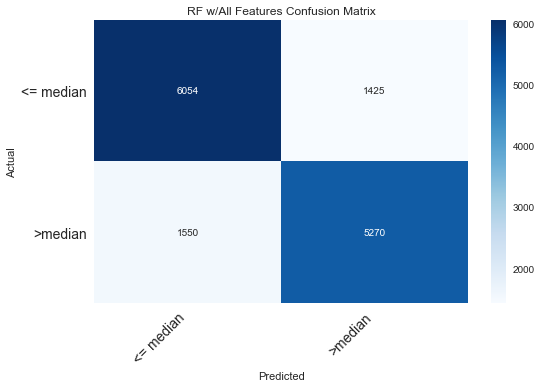

In [89]:
name = 'RF w/All Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cross_validation_report(X_ltr,y_ltr_c,rf_bin,cnames = ['<= median', '>median'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: LGBM w/Selected Features
 AUC : 0.8743741955918358
 F1 weighted : 0.7906129572786625
 Accuracy : 0.7906144450371182
 Kappa Statitic : 0.5802453680194191
Process Complete in : 13.620293855667114 sec.


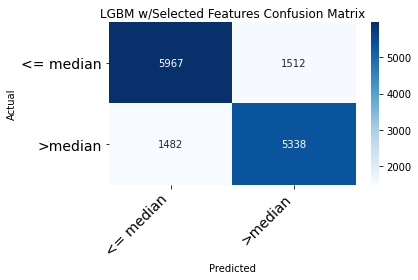

In [69]:
name = 'LGBM w/Selected Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cross_validation_report(X_ltr[selected_feat_lgb],y_ltr_c,lgbm_bin,cnames = ['<= median', '>median'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: LGBM w/All Features
 AUC : 0.8783400718987607
 F1 weighted : 0.7957291387695975
 Accuracy : 0.7957194380147494
 Kappa Statitic : 0.5905111328935533
Process Complete in : 16.09695076942444 sec.


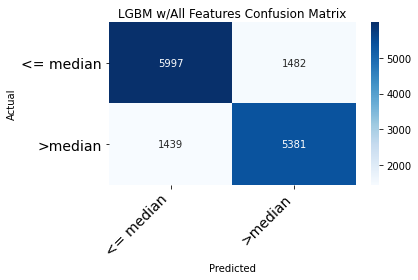

In [70]:
name = 'LGBM w/All Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cross_validation_report(X_ltr,y_ltr_c,lgbm_bin,cnames = ['<= median', '>median'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: Dummy Classifier
 AUC : 0.5
 F1 weighted : 0.5003065350553232
 Accuracy : 0.4999642764513304
 Kappa Statitic : -0.00013314955842138598
Process Complete in : 0.22982001304626465 sec.


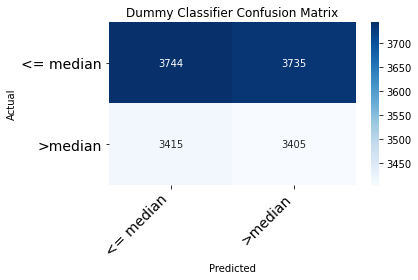

In [71]:
name = 'Dummy Classifier'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cross_validation_report(X_ltr,y_ltr_c,dummy,cnames = ['<= median', '>median'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

## Hold Out Validation

In [72]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, cohen_kappa_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
from sklearn.preprocessing import StandardScaler

[LibLinear][LibLinear]Accuracy score : 0.7756643356643357
AUC score: 0.852751440945692
F1 score: 0.7591591591591591
Kappa score: 0.5494270149239189


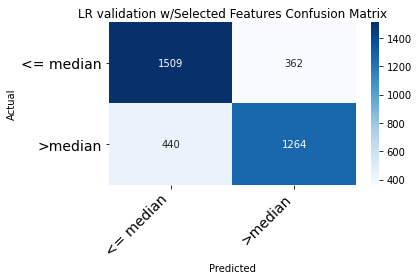

In [73]:
predictions,proba = test_validation_bin(lr_bin, X_ltr, y_ltr_c, X_lho,selected_feat_lr, True)
model_name = 'LR validation w/Selected Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba)
f1_results[model_name] = f1_score(y_lho_c, predictions)
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {accuracy_score(y_lho_c, predictions)}')
print(f'AUC score: {roc_auc_score(y_lho_c, proba)}')
print(f'F1 score: {f1_score(y_lho_c, predictions)}')
print(f'Kappa score: {cohen_kappa_score(y_lho_c, predictions)}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['<= median', '>median']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()
#Save for AUC plot
predictions_lr_sel = predictions.copy()
proba_lr_sel = proba.copy()

[LibLinear][LibLinear]Accuracy score : 0.7773426573426574
AUC score: 0.8548797685453539
F1 score: 0.7618192698982645
Kappa score: 0.5529386776461169


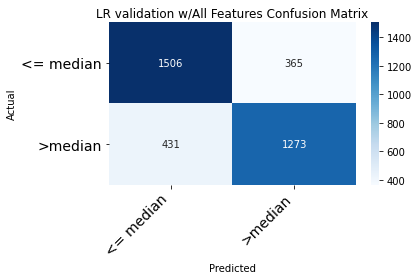

In [74]:
predictions,proba = test_validation_bin(lr_bin, X_ltr, y_ltr_c, X_lho,False, True)
model_name = 'LR validation w/All Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba)
f1_results[model_name] = f1_score(y_lho_c, predictions)
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {accuracy_score(y_lho_c, predictions)}')
print(f'AUC score: {roc_auc_score(y_lho_c, proba)}')
print(f'F1 score: {f1_score(y_lho_c, predictions)}')
print(f'Kappa score: {cohen_kappa_score(y_lho_c, predictions)}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['<= median', '>median']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()
#Save for AUC plot
predictions_lr_all = predictions.copy()
proba_lr_all = proba.copy()

Accuracy score : 0.7868531468531469
AUC score: 0.8628303761639854
F1 score: 0.7745562130177516
Kappa score: 0.5724605018572775


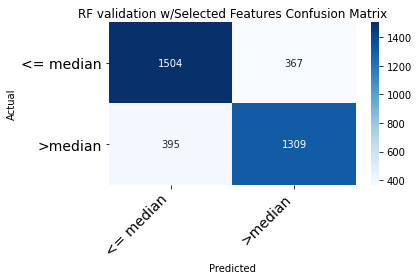

In [75]:
predictions,proba = test_validation_bin(rf_bin, X_ltr, y_ltr_c, X_lho,selected_feat_rf)
model_name = 'RF validation w/Selected Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba)
f1_results[model_name] = f1_score(y_lho_c, predictions)
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {accuracy_score(y_lho_c, predictions)}')
print(f'AUC score: {roc_auc_score(y_lho_c, proba)}')
print(f'F1 score: {f1_score(y_lho_c, predictions)}')
print(f'Kappa score: {cohen_kappa_score(y_lho_c, predictions)}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['<= median', '>median']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()
#Save for AUC plot
predictions_rf_sel = predictions.copy()
proba_rf_sel = proba.copy()

Accuracy score : 0.7966433566433566
AUC score: 0.8735672094207863
F1 score: 0.7833084947839046
Kappa score: 0.5918306931885694


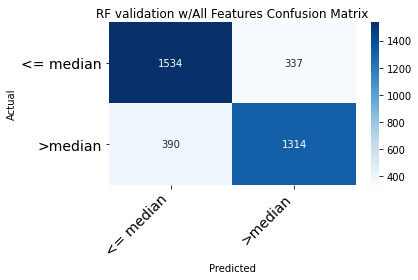

In [76]:
predictions,proba = test_validation_bin(rf_bin, X_ltr, y_ltr_c, X_lho,False)
model_name = 'RF validation w/All Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba)
f1_results[model_name] = f1_score(y_lho_c, predictions)
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {accuracy_score(y_lho_c, predictions)}')
print(f'AUC score: {roc_auc_score(y_lho_c, proba)}')
print(f'F1 score: {f1_score(y_lho_c, predictions)}')
print(f'Kappa score: {cohen_kappa_score(y_lho_c, predictions)}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['<= median', '>median']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()
#Save for AUC plot
predictions_rf_all = predictions.copy()
proba_rf_all = proba.copy()

Accuracy score : 0.7921678321678322
AUC score: 0.8738102945124874
F1 score: 0.781791483113069
Kappa score: 0.5833939133297479


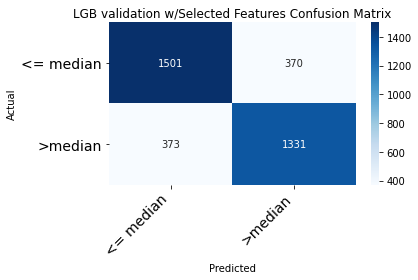

In [78]:
predictions,proba = test_validation_bin(lgbm_bin,  X_ltr, y_ltr_c, X_lho, selected = selected_feat_lgb)
model_name = 'LGB validation w/Selected Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba)
f1_results[model_name] = f1_score(y_lho_c, predictions)
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {accuracy_score(y_lho_c, predictions)}')
print(f'AUC score: {roc_auc_score(y_lho_c, proba)}')
print(f'F1 score: {f1_score(y_lho_c, predictions)}')
print(f'Kappa score: {cohen_kappa_score(y_lho_c, predictions)}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['<= median', '>median']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()
#Save for AUC plot
predictions_lgbm_sel = predictions.copy()
proba_lgbm_sel = proba.copy()

Accuracy score : 0.5194405594405594
AUC score: 0.8790684602896194
F1 score: 0.5074541284403671
Kappa score: 0.03879320058694202


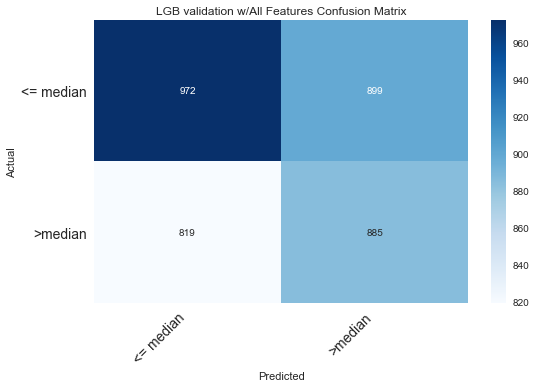

In [84]:
ppredictions,proba = test_validation_bin(lgbm_bin,  X_ltr, y_ltr_c, X_lho, selected = False)
model_name = 'LGB validation w/All Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba)
f1_results[model_name] = f1_score(y_lho_c, predictions)
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {accuracy_score(y_lho_c, predictions)}')
print(f'AUC score: {roc_auc_score(y_lho_c, proba)}')
print(f'F1 score: {f1_score(y_lho_c, predictions)}')
print(f'Kappa score: {cohen_kappa_score(y_lho_c, predictions)}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['<= median', '>median']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()
#Save for AUC plot
predictions_lgbm_all = predictions.copy()
proba_lgbm_all = proba.copy()

Accuracy score : 0.5194405594405594
AUC score: 0.5
F1 score: 0.5074541284403671
Kappa score: 0.03879320058694202


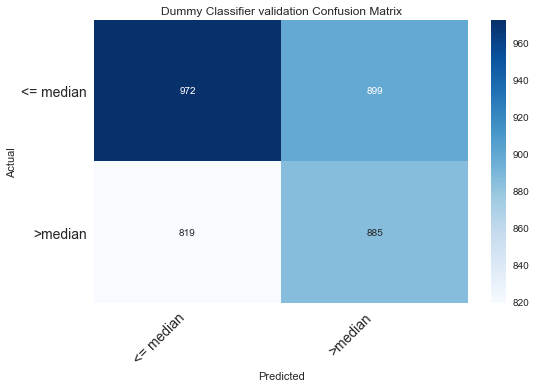

In [85]:
predictions,proba = test_validation_bin(dummy,X_ltr, y_ltr_c, X_lho, selected = False)
model_name = 'Dummy Classifier validation'
auc_results[model_name] = roc_auc_score(y_lho_c, proba)
f1_results[model_name] = f1_score(y_lho_c, predictions)
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {accuracy_score(y_lho_c, predictions)}')
print(f'AUC score: {roc_auc_score(y_lho_c, proba)}')
print(f'F1 score: {f1_score(y_lho_c, predictions)}')
print(f'Kappa score: {cohen_kappa_score(y_lho_c, predictions)}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['<= median', '>median']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()
#Save for AUC plot
predictions_dummy = predictions.copy()
proba_dummy = proba.copy()

In [161]:
proba_sel_dic = {}
proba_sel_dic['LogReg'] = proba_lr_sel
proba_sel_dic['RF'] = proba_rf_sel
proba_sel_dic['LGBM'] = proba_lgbm_sel
proba_sel_dic['Dummy'] = proba_dummy
multi_algo_auc_plot(proba_sel_dic, y_lho_c, y_lho_c,  title = 'Current Income Binary Classifiers - Selected Features ROC Curve')

NameError: name 'proba_lr_sel' is not defined

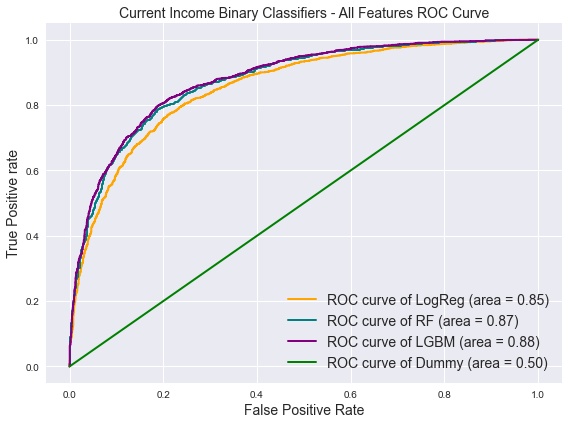

In [86]:
proba_sel_dic = {}
proba_sel_dic['LogReg'] = proba_lr_all
proba_sel_dic['RF'] = proba_rf_all
proba_sel_dic['LGBM'] = proba_lgbm_all
proba_sel_dic['Dummy'] = proba_dummy
multi_algo_auc_plot(proba_sel_dic, y_lho_c, y_lho_c,  title = 'Current Income Binary Classifiers - All Features ROC Curve')

## Export Results

In [90]:
class_df = pd.DataFrame.from_dict(classifiers)
class_df['CV_mean_acc']= 0.0
class_df['CV_mean_f1'] = 0.0
class_df['CV_mean_auc'] = 0.0
class_df['CV_mean_kappa'] = 0.0
class_df['CV_sd_acc'] = 0.0
class_df['CV_sd_f1']  = 0.0
class_df['CV_sd_auc'] = 0.0
class_df['CV_sd_kappa'] = 0.0
others= ['LogReg w/Selected Features',    'LogReg w/All Features',
           'RF w/Selected Features',        'RF w/All Features',
          'LGBM w/Selected Features',        'LGBM w/All Features','Dummy Classifier']
for item in others:
    class_df.at[item,'CV_mean_acc'] = round(np.mean(class_df['acc'][item]),4)
    class_df.at[item,'CV_mean_f1']= round(np.mean(class_df['f1'][item]),4)
    class_df.at[item,'CV_mean_auc'] = round(np.mean(class_df['auc'][item]),4)
    class_df.at[item,'CV_mean_kappa'] = round(np.mean(class_df['kappa'][item]),4)
    class_df.at[item,'CV_sd_acc'] = round(np.std(class_df['acc'][item]),4)
    class_df.at[item,'CV_sd_f1'] = round(np.std(class_df['f1'][item]),4)
    class_df.at[item,'CV_sd_auc'] = round(np.std(class_df['auc'][item]),4)
    class_df.at[item,'CV_sd_kappa'] = round(np.std(class_df['kappa'][item]),4)

In [93]:
class_df

,acc,f1,auc,kappa,time,CV_mean_acc,CV_mean_f1,CV_mean_auc,CV_mean_kappa,CV_sd_acc,CV_sd_f1,CV_sd_auc,CV_sd_kappa
LogReg w/Selected Features,"[0.7692307692307693, 0.7580419580419581, 0.779...","[0.768824192363772, 0.7577273708807813, 0.7796...","[0.8473380397127661, 0.8401254657799161, 0.860...","[0.5383531759618865, 0.5127681951211827, 0.557...",1.052676,0.7722,0.7720,0.8504,0.5427,0.0090,0.0091,0.0072,0.0184
LogReg w/All Features,"[0.7797202797202797, 0.7727272727272727, 0.776...","[0.7793943351612121, 0.7723829660856055, 0.776...","[0.8532435091672682, 0.8471455748942659, 0.860...","[0.5593457441084687, 0.5422075299596729, 0.550...",2.478863,0.7752,0.7751,0.8553,0.5489,0.0060,0.0060,0.0055,0.0124
RF w/Selected Features,"[0.7741258741258741, 0.786013986013986, 0.7944...","[0.7738820294789233, 0.7857653336453676, 0.794...","[0.8633604644566636, 0.8623040579846861, 0.873...","[0.5481686690887464, 0.5691787241751404, 0.587...",126.423672,0.7854,0.7854,0.8649,0.5696,0.0072,0.0073,0.0054,0.0146
LGBM w/Selected Features,"[0.7923076923076923, 0.7958041958041958, 0.790...","[0.792120117293219, 0.7955669196877365, 0.7910...","[0.87405838179574, 0.871419194063173, 0.879800...","[0.5845454954523133, 0.5888895015004607, 0.580...",13.620294,0.7906,0.7906,0.8744,0.5802,0.0050,0.0049,0.0047,0.0101
LGBM w/All Features,"[0.8, 0.8013986013986014, 0.793006993006993, 0...","[0.7998590515342826, 0.801293109704332, 0.7931...","[0.8756623847611893, 0.87584508592362, 0.88139...","[0.5999405261479529, 0.6005382288023229, 0.584...",16.096951,0.7957,0.7957,0.8783,0.5905,0.0071,0.0071,0.0048,0.0144
Dummy Classifier,"[0.5013986013986014, 0.4965034965034965, 0.490...","[0.5013993328821846, 0.49709514926906234, 0.49...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.0027933015533339045, -0.007089534719939783,...",0.229820,0.5000,0.5003,0.5000,-0.0001,0.0099,0.0098,0.0000,0.0199
LR validation w/Selected Features,0.775664,0.759159,0.852751,0.549427,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
LR validation w/All Features,0.777343,0.761819,0.85488,0.552939,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RF validation w/Selected Features,0.786853,0.774556,0.86283,0.572461,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RF validation w/All Features,0.796643,0.783308,0.873567,0.591831,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [92]:
class_df.to_csv('class_models/CInc_full/Binary/class_cinc2.csv')